#Introduction to Apache Spark lab
asifyarawan@gmail.com

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar -xvf spark-3.1.2-bin-hadoop3.2.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop3.2"

#RDD

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession


In [ ]:

spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [ ]:
from pyspark import SparkContext
from pyspark import SparkConf

In [ ]:
#conf = SparkConf().setAppName("My Spark APP").setMaster("local")
#sc = SparkContext(conf=conf)

In [ ]:
sc = spark.sparkContext

In [ ]:
list = [1,2,3,4,5]
rdd = sc.parallelize(list)

In [ ]:
rdd.map(lambda x : x * 2).map(lambda x: x +2).collect()

[4, 6, 8, 10, 12]

In [ ]:
rdd.collect()

In [ ]:
rdd.filter(lambda x: x >3).count()

2

In [ ]:
rdd.reduce(lambda x,y : x + y)

15

In [ ]:
sc.parallelize([1,2,3,4,5,6,7,8] , 3).glom().collect()

In [ ]:
data = [1, 2, 3, 4, 5]
RDD = sc.parallelize(data)

In [ ]:
RDD.map(lambda x: x * 2).collect()

In [ ]:
RDD.reduce(lambda a, b: a + b)

In [ ]:
[x * 2 for x in data]

In [ ]:
RDD.filter(lambda x: x > 3).collect()

In [ ]:
list = range(1, 101)
rdd_list = sc.parallelize(list , 4)
rdd_list.take(5)

In [ ]:
sentences = ["The quick brown fox", "jumps over the lazy dog"]
rdd = sc.parallelize(sentences)
words = rdd.flatMap(lambda sentence: sentence.split())
words.collect()

In [ ]:
rdd = sc.parallelize([(1, 2), (3, 4), (1, 1)])
grouped = rdd.groupByKey()
result = grouped.mapValues(lambda x: sum([i for i in x]))
result.collect()



In [ ]:
count_rdd = sc.parallelize([('apple', 3), ('banana', 2), ('apple', 2), ('orange', 6) , ('banana', 7)])
grouped = count_rdd.groupByKey()
grouped.mapValues(lambda x: sum([i for i in x])).collect()


In [ ]:
count_rdd.reduceByKey(lambda x, y: x +  y * 2).collect()


In [ ]:
#!wget https://github.com/AsifYar/Datasets/

lines = sc.textFile("/content/README.md")
lineLengths = lines.map(lambda s: len(s))
totalLength = lineLengths.reduce(lambda a, b: a + b)
totalLength

In [ ]:
pairs = lines.map(lambda s: (s, 1))
counts = pairs.reduceByKey(lambda a, b: a + b)
counts.collect()

In [ ]:
from pyspark.storagelevel import StorageLevel

lines.persist( StorageLevel.MEMORY_ONLY)
#er 

lines.cache()

/content/README.md MapPartitionsRDD[81] at textFile at NativeMethodAccessorImpl.java:0

#Spark SQL

In [ ]:
df = spark.read.csv('/content/cars.csv' , header = True , sep=';' )
df.show()

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0| 3504.|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0| 3693.|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0| 3436.|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0| 3433.|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0| 3449.|        10.5|   70|    US|
|    Ford Galaxie 500|15.0|        8|       429.0|     198.0| 4341.|        10.0|   70|    US|
|    Chevrolet Impala|14.0|        8|       454.0|     220.0| 4354.|         9.0|   70|    US|
|   Plymouth Fury iii|14.0|        8|       440.0|

In [ ]:
df.show(5, truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449. |10.5        |70   |US    |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



In [ ]:
df.limit(5) #show, take

Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
Chevrolet Chevell...,18.0,8,307.0,130.0,3504.,12.0,70,US
Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


In [ ]:
df.describe()

summary,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
count,406,406,406,406,406,406,406,406,406
mean,null,23.051231527093602,5.475369458128079,194.7795566502463,103.5295566502463,2979.4137931034484,15.519704433497521,75.92118226600985,null
stddev,null,8.4017773522706,1.712159631548529,104.92245837948867,40.52065912106347,847.0043282393513,2.8033588163425462,3.7487373454558743,null
min,AMC Ambassador Br...,0,3,100.0,0,1613.,10.0,70,Europe
max,Volvo Diesel,9.0,8,98.00,98.00,5140.,9.50,82,US


In [ ]:
df.printSchema()

root
 |-- Car: string (nullable = true)
 |-- MPG: string (nullable = true)
 |-- Cylinders: string (nullable = true)
 |-- Displacement: string (nullable = true)
 |-- Horsepower: string (nullable = true)
 |-- Weight: string (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Origin: string (nullable = true)



In [ ]:
df.select(df.Car)

Car
Chevrolet Chevell...
Buick Skylark 320
Plymouth Satellite
AMC Rebel SST
Ford Torino
Ford Galaxie 500
Chevrolet Impala
Plymouth Fury iii
Pontiac Catalina
AMC Ambassador DPL


In [ ]:
from pyspark.sql.functions import col
df.select( col('Weight')).show(truncate=False)

+------+
|Weight|
+------+
|3504. |
|3693. |
|3436. |
|3433. |
|3449. |
|4341. |
|4354. |
|4312. |
|4425. |
|3850. |
|3090. |
|4142. |
|4034. |
|4166. |
|3850. |
|3563. |
|3609. |
|3353. |
|3761. |
|3086. |
+------+
only showing top 20 rows



In [ ]:
import numpy as np

from pyspark.sql.functions import lit
df = df.withColumn('first_column',lit(np.random.randint(0,5))) 
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|first_column|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+------------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |4           |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |4           |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |4           |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |4           |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449. |10.5        |70   |US    |4           |
+-------------------------+----+---------+------------+----------+------+------------+-----+----

In [ ]:
df = df.drop('first_column')
df.show(5,truncate=False)

+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449. |10.5        |70   |US    |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



In [ ]:
#@title groupBy
df.groupBy('Origin' , 'Cylinders').count().show(5)

+------+---------+-----+
|Origin|Cylinders|count|
+------+---------+-----+
|    US|        8|  108|
|Europe|        5|    3|
|Europe|        6|    4|
|    US|        4|   72|
| Japan|        6|    6|
+------+---------+-----+
only showing top 5 rows



In [ ]:
#@title filter

df.filter((col('Origin')=='Europe') & (col('Cylinders')==4)).show(truncate=False)

+----------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                         |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+----------------------------+----+---------+------------+----------+------+------------+-----+------+
|Citroen DS-21 Pallas        |0   |4        |133.0       |115.0     |3090. |17.5        |70   |Europe|
|Volkswagen 1131 Deluxe Sedan|26.0|4        |97.00       |46.00     |1835. |20.5        |70   |Europe|
|Peugeot 504                 |25.0|4        |110.0       |87.00     |2672. |17.5        |70   |Europe|
|Audi 100 LS                 |24.0|4        |107.0       |90.00     |2430. |14.5        |70   |Europe|
|Saab 99e                    |25.0|4        |104.0       |95.00     |2375. |17.5        |70   |Europe|
|BMW 2002                    |26.0|4        |121.0       |113.0     |2234. |12.5        |70   |Europe|
|Volkswagen Super Beetle 117 |0   |4        |97.00       |48.00     |1978

In [ ]:
#@title orderBy

df.orderBy('Cylinders' , ascending=False).show(5, truncate=False) 

+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Car                      |MPG |Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevelle Malibu|18.0|8        |307.0       |130.0     |3504. |12.0        |70   |US    |
|Buick Skylark 320        |15.0|8        |350.0       |165.0     |3693. |11.5        |70   |US    |
|Plymouth Satellite       |18.0|8        |318.0       |150.0     |3436. |11.0        |70   |US    |
|AMC Rebel SST            |16.0|8        |304.0       |150.0     |3433. |12.0        |70   |US    |
|Ford Torino              |17.0|8        |302.0       |140.0     |3449. |10.5        |70   |US    |
+-------------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



In [ ]:
res = df.groupBy("Origin").count().orderBy('count', ascending=False).show(10)
res

+------+-----+
|Origin|count|
+------+-----+
|    US|  254|
| Japan|   79|
|Europe|   73|
+------+-----+



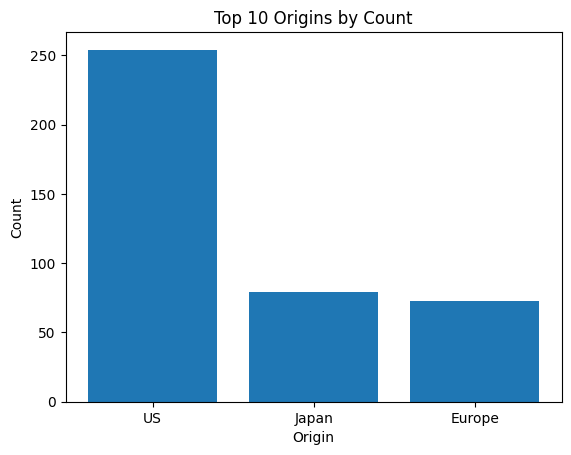

In [ ]:
import matplotlib.pyplot as plt

labels = [row['Origin'] for row in df.groupBy("Origin").count().orderBy('count', ascending=False).take(10)]
values = [row['count'] for row in df.groupBy("Origin").count().orderBy('count', ascending=False).take(10)]



plt.bar(labels, values)
plt.title('Top 10 Origins by Count')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.show()


In [ ]:
from pyspark.sql.functions import min, max
df.select(min(col('Weight')), max(col('Weight'))).show()

+-----------+-----------+
|min(Weight)|max(Weight)|
+-----------+-----------+
|      1613.|      5140.|
+-----------+-----------+



In [ ]:
from pyspark.sql.functions import col,lower, upper, substring
df.select(col('Car'),lower(col('Car')),upper(col('Car')),substring(col('Car'),1,4).alias("concatenated value")).show(5, False)

# select car from table as CAR

+-------------------------+-------------------------+-------------------------+------------------+
|Car                      |lower(Car)               |upper(Car)               |concatenated value|
+-------------------------+-------------------------+-------------------------+------------------+
|Chevrolet Chevelle Malibu|chevrolet chevelle malibu|CHEVROLET CHEVELLE MALIBU|Chev              |
|Buick Skylark 320        |buick skylark 320        |BUICK SKYLARK 320        |Buic              |
|Plymouth Satellite       |plymouth satellite       |PLYMOUTH SATELLITE       |Plym              |
|AMC Rebel SST            |amc rebel sst            |AMC REBEL SST            |AMC               |
|Ford Torino              |ford torino              |FORD TORINO              |Ford              |
+-------------------------+-------------------------+-------------------------+------------------+
only showing top 5 rows



spark SQL

In [ ]:
df.createOrReplaceTempView("temp")
spark.sql("select * from temp limit 5").show()


+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0| 3504.|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0| 3693.|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0| 3436.|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0| 3433.|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0| 3449.|        10.5|   70|    US|
+--------------------+----+---------+------------+----------+------+------------+-----+------+



In [ ]:
df.show(5)

+--------------------+----+---------+------------+----------+------+------------+-----+------+
|                 Car| MPG|Cylinders|Displacement|Horsepower|Weight|Acceleration|Model|Origin|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
|Chevrolet Chevell...|18.0|        8|       307.0|     130.0| 3504.|        12.0|   70|    US|
|   Buick Skylark 320|15.0|        8|       350.0|     165.0| 3693.|        11.5|   70|    US|
|  Plymouth Satellite|18.0|        8|       318.0|     150.0| 3436.|        11.0|   70|    US|
|       AMC Rebel SST|16.0|        8|       304.0|     150.0| 3433.|        12.0|   70|    US|
|         Ford Torino|17.0|        8|       302.0|     140.0| 3449.|        10.5|   70|    US|
+--------------------+----+---------+------------+----------+------+------------+-----+------+
only showing top 5 rows



In [ ]:
spark.sql("select count(*) as total_count from temp").show()

+-----------+
|total_count|
+-----------+
|        406|
+-----------+



##Unstructured data


In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import col, split

In [ ]:
def extract_data(start, end , path):
    with open(path) as f:
        for line in f:
            if line.startswith(start):
                result = []
                result.append(line.strip())
                for line in f:
                    if line.rstrip() == end:
                        break
                    result.append(line.strip())
    f.close()
    return(result)

In [ ]:
path = '/content/unstructured.txt'
getList = extract_data("Error", "&closed" , path)
getList

In [ ]:
from pyspark.sql.types import StringType
data = spark.createDataFrame(getList,StringType())
data.cache()

value
"Error 1, Asif, 20..."
"Error 2, Haris, 2..."
"Error 3, Ali, 202..."
"Error 4, Awan, 20..."
"Error 5, Wali, 20..."
"Error 6, ""Asfand:..."


In [ ]:
cleaned = data.select(split(col("value"), ",").getItem(0).alias("Error"),
                     split(col("value"), ",").getItem(1).alias("Programmer"),
                     split(col("value"), ",").getItem(2).alias("date"),
                     split(col("value"), ",").getItem(3).alias("Age"),
                     split(col("value"), ",").getItem(4).alias("Affiliation")).drop("value")

cleaned.show(truncate=False)

+-------+----------+--------------------+----+-----------+
|Error  |Programmer|date                |Age |Affiliation|
+-------+----------+--------------------+----+-----------+
|Error 1| Asif     | 2021-06-16 03:31:00| 22 | ATU       |
|Error 2| Haris    | 2022-04-16 03:33:00| 23 | ATU       |
|Error 3| Ali      | 2023-06-8 03:36:00 | 45 | UCD       |
|Error 4| Awan     | 2022-06-5 03:38:00 | 34 |null       |
|Error 5| Wali     | 2021-06-9 03:39:00 | 23 | GCT       |
|Error 6| "Asfand: | 2022-06-2 03:42:00 | 41 |null       |
+-------+----------+--------------------+----+-----------+



In [ ]:

# read the JSON file
df = spark.read  .json("/content/data_json.json")
df.show()


+-----------------+----+------------+
|  _corrupt_record|  id|        type|
+-----------------+----+------------+
|                {|null|        null|
|   	"id": "0001",|null|        null|
|	"type": "donut",|null|        null|
| 	"name": "Cake",|null|        null|
|    	"ppu": 0.55,|null|        null|
|      	"batters":|null|        null|
|              		{|null|        null|
|     			"batter":|null|        null|
|            				[|null|        null|
|             null|1001|     Regular|
|             null|1002|   Chocolate|
|             null|1003|   Blueberry|
|             null|1004|Devil's Food|
|            				]|null|        null|
|             		},|null|        null|
|      	"topping":|null|        null|
|              		[|null|        null|
|             null|5001|        None|
|             null|5002|      Glazed|
|             null|5005|       Sugar|
+-----------------+----+------------+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import explode,col
df_json = spark.read.option("multiline","true").json("/content/data_json.json")
df_json.printSchema()

root
 |-- batters: struct (nullable = true)
 |    |-- batter: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- id: string (nullable = true)
 |    |    |    |-- type: string (nullable = true)
 |-- id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- ppu: double (nullable = true)
 |-- topping: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- id: string (nullable = true)
 |    |    |-- type: string (nullable = true)
 |-- type: string (nullable = true)



In [ ]:
df_final = df_json.withColumn("topping_explode",explode("topping"))\
                .withColumn("topping_id",col("topping_explode.id"))\
                .withColumn("topping_type",col("topping_explode.type"))\
                .drop("topping","topping_explode")\
                .withColumn("batter_explode",explode("batters.batter"))\
                .withColumn("batter_id",col("batter_explode.id"))\
                .withColumn("batter_type",col("batter_explode.type"))\
                .drop("batters","batter_explode")
df_final.show()
     

+----+----+----+-----+----------+--------------------+---------+------------+
|  id|name| ppu| type|topping_id|        topping_type|batter_id| batter_type|
+----+----+----+-----+----------+--------------------+---------+------------+
|0001|Cake|0.55|donut|      5001|                None|     1001|     Regular|
|0001|Cake|0.55|donut|      5001|                None|     1002|   Chocolate|
|0001|Cake|0.55|donut|      5001|                None|     1003|   Blueberry|
|0001|Cake|0.55|donut|      5001|                None|     1004|Devil's Food|
|0001|Cake|0.55|donut|      5002|              Glazed|     1001|     Regular|
|0001|Cake|0.55|donut|      5002|              Glazed|     1002|   Chocolate|
|0001|Cake|0.55|donut|      5002|              Glazed|     1003|   Blueberry|
|0001|Cake|0.55|donut|      5002|              Glazed|     1004|Devil's Food|
|0001|Cake|0.55|donut|      5005|               Sugar|     1001|     Regular|
|0001|Cake|0.55|donut|      5005|               Sugar|     1002|